# **(Call Back and Early Stopping) means if our epochs are running and not having increasing accuracy and decreasing loss**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import tensorflow as tf
df=sns.load_dataset('tips')

df=pd.get_dummies(df,drop_first=True)

X=df.drop('tip',axis=1)
y=df['tip']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Building The Mode

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu',  #input layer
                          input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(32,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1)                     #output layer


])

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

#Training The Model
model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=1)

#Evaluating The Model
loss=model.evaluate(X_test,y_test,verbose=1)
print('Mean_Squared_Error',loss[0])

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12.0362 - mae: 3.1526  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.0198 - mae: 2.8095 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.2753 - mae: 2.4812 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7815 - mae: 2.1683 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5381 - mae: 1.8791 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4407 - mae: 1.6162 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6201 - mae: 1.4095 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9179 - mae: 1.2508 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4450 - mae: 1.1530 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0669 - mae: 1.0705 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3710 - mae: 0.9789
Mean_Squared_Error 1.3709574937820435


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 9.9392 - mae: 2.7714 - val_loss: 5.4123 - val_mae: 2.0121
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.7481 - mae: 2.3575 - val_loss: 3.9715 - val_mae: 1.6270
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9643 - mae: 1.9801 - val_loss: 2.8150 - val_mae: 1.3086
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.5378 - mae: 1.6415 - val_loss: 1.9597 - val_mae: 1.0914
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3586 - mae: 1.3611 - val_loss: 1.4616 - val_mae: 0.9490
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5987 - mae: 1.1896 - val_loss: 1.2544 - val_mae: 0.9356
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1008 - mae: 1.1131 - val_loss: 1.2092 - val_mae: 0.9579
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7952 - mae: 1.0469 - val_loss: 1.2064 - val_mae: 0.9608
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5887 - mae: 

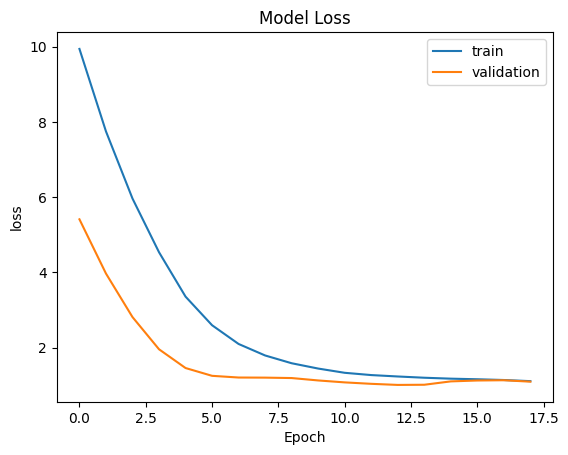

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

# Building The Mode

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,activation='relu', #input layer
                          input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(32,activation='relu'), #hidden layer
    tf.keras.layers.Dense(1) #output layer


])

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

early_stopping=EarlyStopping(patience=5)

#Training The Model
history=model.fit(X_train,y_train,
                  epochs=100,batch_size=32,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stopping],
                  verbose=1)

#Evaluating The Model
loss=model.evaluate(X_test,y_test,verbose=1)
print('Mean_Squared_Error',loss[0])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc="upper right")
plt.show()
